# Tutorial Through the Data Science Pipeline
# <u> **Introduction** </u>

## Spring 2024 Data Science Project
## By: Aaryan Jadhav, Sowmya Datla
Member 1: Aaryan Jadhav contribution: 95% (did not contribute to G)
Member 2: Sowmya Datla contribution: 95% (did not contribute to C)
"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."
- Signed and agreed by both Aaryan Jadhav and Sowmya Datla (May 7, 2024)

**Required Material**


*   Python 3.7 or higher
*   [Jupyter Notebook](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)
*   [Pandas](https://pandas.pydata.org/getting_started.html)
*   [Matplotlib](https://matplotlib.org/stable/users/installing.html)
*   [Numpy](https://numpy.org/install/)
*   [SciPy](https://scipy.org/install/)
*   [Scikit-learn](https://scikit-learn.org/stable/)
*   [Seaborn](https://seaborn.pydata.org/)

**Topic:** The topic of our project is the Analysis of Battery/Plug-in Hybrid Electric Vehicles (BEV's and PHEV's) Registrations in Washington State.

**Some questions we are trying to answer:** Firstly, we want to do some trend analysis, looking at how the registrations of BEVs and PHEVs have changed over time in the state of Washington. We also want to look at what are the most popular models of BEVs and PHEVs in Washington using popularity and diversity statistics. We will also use hypothesis testing to look into relations about certain aspects of the data, for example, looking at if there is a correlation between electric range and base MSRP in these electric vehicles. For machine learning predictions, we look to answer a question about if there are distinct clusters of counties or regions based on their electric vehicle registration patterns.

**Why is answering these questions important:** Answering these questions are important because firstly, understanding the trends and factors influencing electric vehicle registrations can inform state policies on infrastructure development, like charging stations, and elective vehicle purchase incentives. Analyzing the shift to electirc vehicles can also help quantify the environmental benefits, which is very important for future planning. This data could also be valuable for car manufacturers and stakeholders in the electric car market to understand consumer trends

Here are all the imports that you need to start this tutorial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# <u>**Data Curation**</u>

**Source of the data:** We got our data from the Data.gov website ([LINK](https://catalog.data.gov/dataset/electric-vehicle-population-data)). During this phase, we are going to be focusing on importing the data from the website and transforming it so that it's ready for analysis

***What is Pandas?***

Pandas is a fast and flexible open soure data analysis and manipulation tool, specifically designed for the Python programming language. We highly recommend referring to the following resources to install pandas and an environment to run this:


*   [https://pandas.pydata.org/getting_started.html](https://pandas.pydata.org/getting_started.html)
*   [https://jupyterlab.readthedocs.io/en/stable/user/interface.html](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)

Once we have downloaded the data as a CSV file, we can import this data into our Python environment and create a data frame (Here we call it 'df') using this code

In [ ]:
# Importing our data (the csv file downloaded) into a dataframe called 'df'
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Parsing the data by looking at the types and if the variables have the correct types (i.e numbers had int64, etc.)
print("TYPES:")
print(df.dtypes)
print('------------------------------------------------------------------------------------------------------')
print("DATAFRAME:")
print(df.head)

TYPES:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract

In this code, **'Electric_Vehicle_Population_Data.csv'** is the name of the CSV file that we are going to be extracting data from. we use the pandas function **'read_csv'** to read in the file. Next, we print out the types of the data to make sure that they are correct (number having and int type, etc.), then we print out the dataframe that we have created.

Here is a link to the documentation for Pandas, this shows all of the functions that exist in this library, it is very helpful to keep open when using pandas: [https://pandas.pydata.org/docs/reference/io.html](https://pandas.pydata.org/docs/reference/io.html)

# <u>**Exploratory Data Analysis**</u>
In this section, we are going to use some statistical methods, and plotting, to observe potential trends in our data.

We can also use these methods to determine the best machine learning model to use to answer the questions that we proposed.

Firstly, we are going to create a graph looking at the distribution of electric vehicle model years:

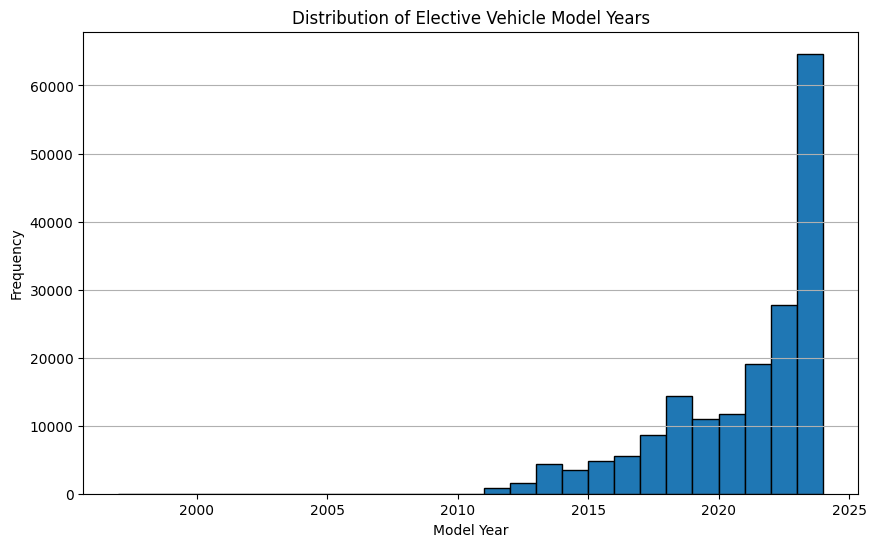

In [ ]:
# 1st Analysis: Descriptive statistics and distribution of electric vehicle model years
plt.figure(figsize = (10, 6))
plt.hist(df['Model Year'], bins = range(int(df['Model Year'].min()), int(df['Model Year'].max()) + 1), edgecolor = 'black')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Distribution of Elective Vehicle Model Years')
plt.grid(axis = 'y')
plt.show()

The distribution of electric vehicle model years in the dataset shows us a concentration of vehicles from very recent years. We can see that the dataset contains vehicles ranging from 1997 to 2024, but we can observe the **significant increase** in frequency for models from 2019 onwards, peaking around 2022. This shows us the rapidly **growing** adoption and availability of electric vehicles in recent years.

**Next**, We are going to look and create a boxplot of the electric vehicle range's:

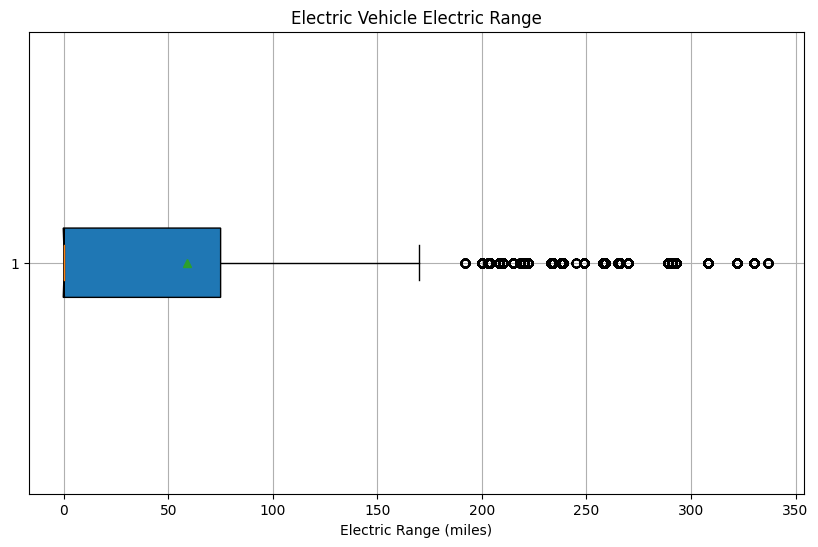

In [ ]:
# Analysis 2: Electric Range Analysis and Outliers
plt.figure(figsize = (10, 6))
plt.boxplot(df['Electric Range'], vert=False, patch_artist=True, notch=True, showmeans=True)

plt.xlabel('Electric Range (miles)')
plt.title('Electric Vehicle Electric Range')
plt.grid(True)
plt.show()

The electric range of vehicles in the dataset shows **significant variability**, with a mean electric range of approx. 59 miles. This mean is **misleading** because of the high number of vehicles with an electric range of 0 miles. The max electric range we observed is 337 miles. We can see a lot of **outliers** in this graph. The significant number of outliers suggests a wide range in the capabilities of electric vehicles with some vehicles having exceptionally high electric ranges.

**Finally**, we are going to use hypothesis testing. We are going to test if there is a correlation between electric range and base MSRP of electric vehicles or not.  

Lets define our hypothesis': Our significance level is 0.05, and we will be using the Pearson Correlation test

**Null Hypothesis(H0)**: There is no correlation between electric range and base MSRP of electric vehicles. The correlation coeff. is 0.

**Alternate Hypothesis(H1)**: There is a correlation between electric range and base MSRP of electic vehicles. The correlation coeff. is not 0.

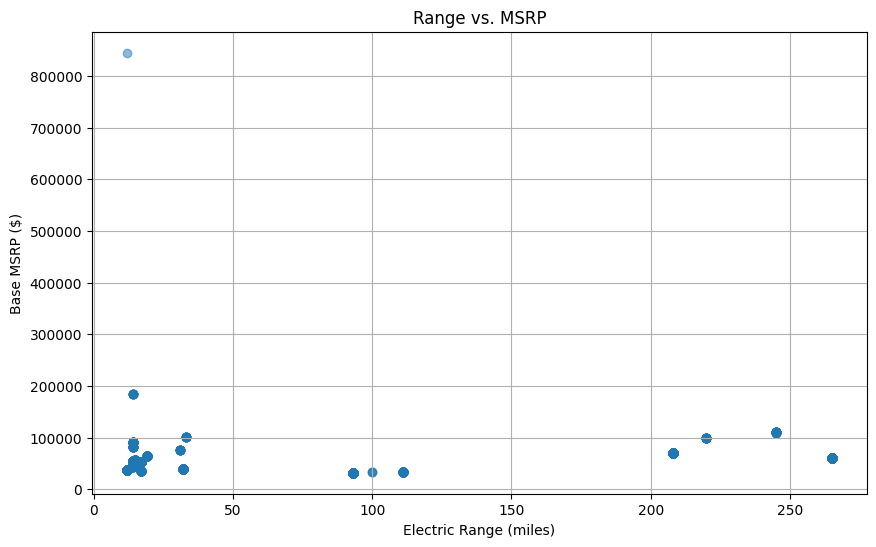

P-value:  6.043662101489954e-133
Correlation Coefficient:  0.40604251198933644


In [ ]:
# Analysis 3: Correlation between electric range and base MSRP
# Using hypothesis testing

# First, we filter the meaningful data
filter = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)]

# Running the Pearson Correlation Test, and gaining a p-value from this
coefficient, p = stats.pearsonr(filter['Electric Range'], filter['Base MSRP'])

# Plotting
plt.figure(figsize = (10, 6))
plt.scatter(filter['Electric Range'], filter['Base MSRP'], alpha = 0.5)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.title('Range vs. MSRP')
plt.grid(True)
plt.show()

# Printing p-value
print('P-value: ', p)
print('Correlation Coefficient: ', coefficient)

Using the Pearson correlation test, we get a p-value of **6.043662101489954e-13**3 and a correlation coefficient of **0.40604251198933644**.

Since the p-value is way less than the significane level of 0.05, we will **reject** the null hypothesis. So, There is a correlation between electric range and base MSRP of electric vehicles. The correlation coefficient is not 0.

This analysis strongly supports that there is a significant difference in base MSRP between vehicles with higher vs. lower electric ranges. There is also a **positive correlation** between electric range and base MSRP, which suggests that these two variables are related in a meaningful way where longer ranges means the vehicles are being priced higher.

In this section we will be breaking down how we implemented the code to generate an analysis of electric vehicle models. For analysis one the graph shows the distribution of elective vehicle model years. To display this graph we imported matplotlib and to set up the figure out the graph we used the plt.figure function. Using plt.hist we created a histogram and used plt.xlabel, plt.ylabel and plt.title to table the graphs. Finally plt.show was used to display the plot. For analysis 2 we wanted to display the electric vehicle electric range in miles. Essentially to generate the box plot we used many of the functions we used for the first analysis however instead of creating a histogram we used plt.boxplot to generate a boxplot. Then we used plt.title and plt.xlabel to label the box plot. In analysis 3, the following scatter plot was to show the correlation between electric range and base MSRP. In order to show this we thought it would be best to use a scatter plot. First, we filtered the meaningful data by choosing to filter out any data points that had an electric range below 0 and an MSRP below 0. We then used many of the similar functions that we had previously used such as plt.figurem plt.xlabel, plt.ylabel, plt.title, plt.grid to properly label the scatter plots. The only different function we used was plt.scatter as this is the function that generates the actual scatter plot.


# <u>**Primary Analysis**</u>

For the question that posed about if there are distinct clusters of counties or regions based on their electric vehicle registration patterns. We can use clustering to help us answer this.

Here is a resource from google talking about clustering algorithms:
[https://developers.google.com/machine-learning/clustering/clustering-algorithms](https://https://developers.google.com/machine-learning/clustering/clustering-algorithms)

***Why Clustering?***

Clustering can be used to find inherent grouping within the data, ike identifying regions or counties with similar electric vehicle registration patterns. Clustering also provides insights into the geographic distribution of electric vehicles, which we can relate to the real world using that data to inform infrastructure development like charging stations and maintenance facilities.


---


For clustering, we are going to be using the **K-means** clustering algorithm. This will help us identify different groups of counties based on similarities in their EV registration data.

Here is a resource to help understand K-means clustering better:
[https://www.geeksforgeeks.org/k-means-clustering-introduction/](https://www.geeksforgeeks.org/k-means-clustering-introduction/)



---

### **Creating The Model**

In the previous steps, we imported the csv file that we downloaded into our Python environment and set it to a dataframe using the **read_csv()** function from the pandas library.

**Now**, we are going to go ahead and create a K-means clustering model to answer our question.

**First**, we are going to Preprocess the data, so basically, we are going to prepare it for the primary processing.

In [ ]:
# We have already loaded the data previously
# So, now we preprocess the data

# Using the .fillna() method in pandas to fill NA/NaN values to the median of the electric range
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
# Creating an encoder to encode categorical data
encode = LabelEncoder()
df['County'] = encode.fit_transform(df['County'].astype(str))

Here is an explanation of what we are doing during this step:


*   Handle Missing Values: Missing data can mislead the training process of ML algorithms, which can lead to a biased answer. For the 'Electric Range' column, we filled in the missing values using the median.

  *   Documentation for the .fillna() method: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)


*   Encoding the Categorical Data: Here, we converted the cateogrical data into numerical values, which helps our machine learning model. The 'County' column is categorical, so we used the 'LabelEncoder' to transform each unique country name into numberical code since the K-means algorithm **requires** numerical input.

  *   Documentation for LabelEncoder: [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)



---



**Next**, we are going to select relevant features for clustering, a feature is an individual measurable property within a recorded dataset.



In [ ]:
# Slecting the features for clustering
# County, Electric Range, Model Year
feature = df[['County', 'Electric Range', 'Model Year']]

Here, to find distinct clusters based on electric vehicle registration patterns, we selected these features:

*   County: This cateogrical variable was encoded into a numerical variable, this indicates the geographic distinctions in vehicle registrations
*   Electric Range: This shows the max distance an electric vehicle can travel on a single charge, which would influence the amount of popularity of different models in various regions.
*   Model Year: Knowing the model year can help in identifying trends over time, like the adoption of newer technologies in different areas.


---



**Then**, we scale the features. Feature scaling is a technique used to transform the values of features or variables in a dataset to a similar scale.

In [ ]:
# Scaling the features with StandardScaler()
s = StandardScaler()
scaled = s.fit_transform(feature)

Machine learning algo's like the K-means clustering algorithm we are using will perform better when features are on a similar scale and close to being normally distributed.

The '**StandardScaler**' standardizes features by removing the mean and scaling to unit variance, making sure that the clustering algo treats all features equally.


---



**Finally**, we are going to apply K-means clustering. This model identifies k number of points, and then allocates every data point to the nearest cluster, while also keeping the points as small as possible.

In [ ]:
# Now, we are going to apply k-means clustering
model = KMeans(n_clusters = 5, random_state = 0)
clustering = model.fit_predict(scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the **n_clusters** here represents the number of clusters to form, and the number of centroids to generate. We set it to 5 in this tutorial.

the **random_state** here is used to initialize the internal random number generator. This will ensure reproducibility of the results.


---
**Now**, after fitting the model, every instance in the dataset is assiged a cluster label from 0-4 in this case. We are going to add these labels to the original database now.

In [ ]:
# Adding the cluster information to the dataframe
df['Clusters'] = clustering

# Displaying the rows along with cluster information now, just to check
print(df[['County', 'Electric Range', 'Model Year', 'Clusters']].head(10))

   County  Electric Range  Model Year  Clusters
0      78             291        2020         4
1     162               0        2023         0
2      78             270        2019         4
3      78             210        2016         4
4      80               0        2021         3
5     175              21        2017         1
6     192              75        2013         1
7     162              29        2018         1
8      80              84        2015         2
9      78              30        2022         3


# **<u>Visualization</u>**

We are now going to plot the results to visualize them. We are going to use a scatter plot with the clusters differentiated by color.

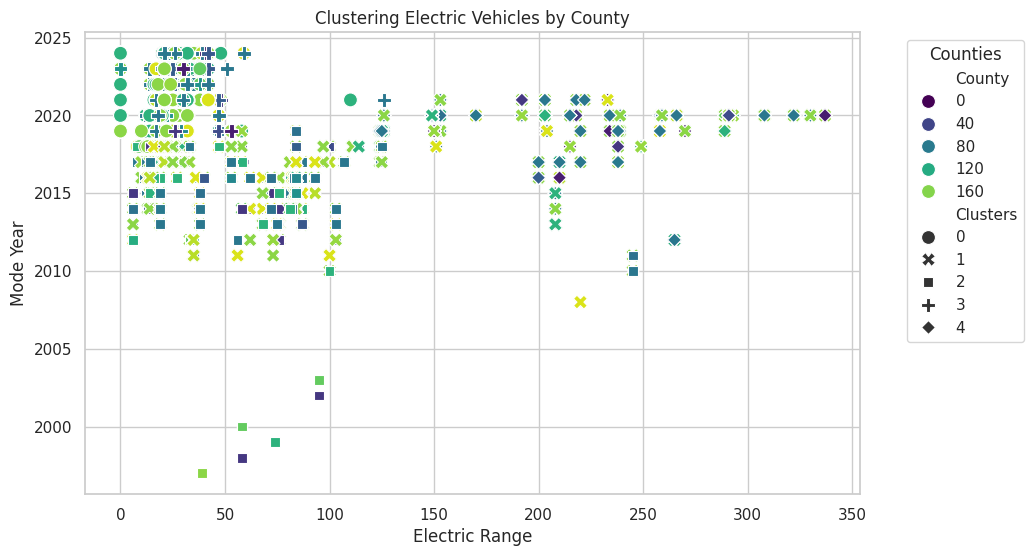

In [ ]:
# Setting the style of the plot
sns.set(style = 'whitegrid')

# Creating a scatterplot using matplotlib .figure() and seaborn .scatterplot() methods
plt.figure(figsize = (10, 6))
# x axis being Electric Range and y axis being Model Year
plot = sns.scatterplot(x = 'Electric Range', y = 'Model Year', hue = 'County', style = 'Clusters', data = df, palette = 'viridis', markers = True, s = 100)

# Now, set the title and labels for each axis' of the graph
plt.title('Clustering Electric Vehicles by County')
plt.xlabel('Electric Range')
plt.ylabel('Mode Year')

# Creating a legend for the graph by labeling each cluster from 1 - 5
plt.legend(title = 'Counties', bbox_to_anchor = (1.05, 1), loc = 2)

# display the graph using the .show() method in matplotlib
plt.show()

The x-axis in the graph represents the 'Electric Range' of vehicles, the y-axis shows the 'Model Year' of the vehicles.

The different colors in the plot represent different Counties and the shapes represent clusters as seen in the legend. These clusters are formed given the similarity of the vehicles in terms of their electric range, model year, and county (after encoding)

Each number (0, 40, 80, 120, 160) represents a specific county in this plot.

Each point on the plot represents a single electric vehicle from the dataset

### Some Insights From the Plot



*   By looking at the distribution over the y-axis, we can see the trends over time, like improvements in electric range in the newer models.
*   Since the County is a feature as well, variations in clusters reflect the geographic trends in electric vehicle adoption and preferences.

This visualization answers the question that we posed in the beginning, are there distinct clusters of counties or regions based on their electric vehicle registration patterns?

We can see clearly that there are clusters of counties based on the electric vehicle range and model year. Although the lower electric vehicle range is very clustered and we would need to do more to separate these values. We can still see a pattern with a higher electric range.


# **<u>Insights and Conclusions</u>.**


Our main topic for this assignment was to generate visualizations for a set of data that had information on electric vehicles based on their range and model year. Our main question when we first approached this project was if there were distinct clusters of regions based on the electric vehicle registration patterns. Once we generated numerous graphs we have come to the conclusion that the answer to this question is yes due to what was presented in the visualizations. I feel like after reading through the project someone would feel informed about the topic as there are many visualizations of the data that show the distributions as well as descriptive explanations that go through what is being displayed.


Sowmya Datla:
In general both me and aaryan both did sections of each of the sections of the project. We both picked a topic together. In terms of data curation and preprocessing, I provided the explanation of the code for the graph. In the data exploration and summary statistics aaryan and I both split the amount of code we needed to write. There were some plots such as the scatter plot and the histogram that I wrote the code for. I also wrote the conclusion and insights.

Aaryan Jadhav: In general both Sowmya and I contributed pretty evenly to towards the overall project. In specific I provided the code for the visualization and for some of the parts of the primary analysis which included the creating the model. I also provided the summaries for some of the exploratory data analysis graphs which explained the code.